# Step 2 Skills & Degree Analysis for Different Majors

In this part, we analyzed the __skill set__, __degree requirement__, __salary level__ and __distribution of jobs__ for different majors. <br>

To get the __skill set__ required for different majors, we did natural language processing on the posts of the jobs, and extracted the top skills that are related to different majors. Further analysis was also done by comparing those skill sets.

The __degree requirement__ were compared across different majors and different job types (internship and fulltime).

The __annual salary levels__ are compared across different majors. They were extracted from the job discription text by using natual language processing and regular expression. Further analysis on the skill requiremnt of different salary levels for statistics major was also performed. 

The __distribution of company locations__ were extracted across different majors and geographical visuallization techiniques were used.

| Information      | Methodology                         |
|------------------|-------------------------------------|
|Skill set         | Natural language processing / Graphs|
|Degree requirement| Natural language processing / Graphs|
|Salary            | Regular expression / Graphs         |
|Job market demand | Geographical data analysis / Data visualization|

In [350]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from collections import Counter

import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer   # sklearn --- primer machine learning package
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib_venn import venn3
from wordcloud import WordCloud
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import re

## Part 1 Qualifications & Skills

__Read data from the csv file got from website__

In [94]:
summary_stat = pd.read_csv('Jobdescription/summary_stat.csv')
summary_che = pd.read_csv('Jobdescription/summary_che.csv')
summary_mse = pd.read_csv('Jobdescription/summary_mse.csv')

__Check how many missing values__

In [3]:
print (summary_stat.isnull().sum())
print (summary_che.isnull().sum())
print (summary_mse.isnull().sum())

Unnamed: 0     0
company        0
description    0
title          0
dtype: int64
Unnamed: 0     0
company        0
description    0
title          0
dtype: int64
Unnamed: 0     0
company        0
description    0
title          0
dtype: int64


### Approach: without using subtitles

In [109]:
stemmer = PorterStemmer().stem

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

stop = set(stopwords.words('english'))

In [110]:
def diction_qual(files):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a list of job description text
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = files[i]
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [120]:
def skills_num(df):
    '''
    Returns a dictionary of the words, the id of posts containing the word
    '''
    job_des = list(df['description'])
    n = len(job_des)
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]

    # Lemmata of subtitles and the id of posts containing that Lemmata
    text_id =diction_qual(job_text)
    
    return pd.DataFrame(text_id)

<font color = 'tomato' size = 3>**skill_major_num**</font> is a dictionary of the words, the id of posts containing that word.

In [135]:
skills_stat_num = skills_num(summary_stat)
skills_che_num = skills_num(summary_che)
skills_mse_num = skills_num(summary_mse)

In [111]:
def skills(df):
    
    job_des = list(df['description'])
    n = len(job_des)
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]

    # Lemmata of subtitles and the id of posts containing that Lemmata
    text_id =diction_qual(job_text)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    text_num = {key:len(set(val)) for key,val in text_id.items()}
    # Sort text_num
    sorted_text = [(key, text_num[key]) for key in sorted(text_num, key=lambda x : text_num[x],
                                                                  reverse=True)]
    df_sorted_text = pd.DataFrame(sorted_text)
    df_sorted_text.columns = ['word', '# of posts']
    df_sorted_text['percent'] = df_sorted_text['# of posts']/n
    
    return df_sorted_text

<font color = 'tomato' size = 3>**skill_major_1**</font> is a data frame of the words, number of posts containing that word, and the frequency of the word.

In [112]:
skills_stat_1 = skills(summary_stat)
skills_che_1 = skills(summary_che)
skills_mse_1 = skills(summary_mse)

In [113]:
prog_lang_dict = ['r', 'python', 'java', 'c', 'ruby', 'perl', 'matlab', 'javascript', 'scala']
analysis_tool_dict = ['excel',  'tableau', 'd','sas', 'spss', 'd3']  
hadoop_dict = ['hadoop','mapreduce', 'spark', 'pig', 'hive', 'shark','oozie','zookeeper','flume', 'mahout']
database_dict = ['sql', 'nosql', 'hbase', 'cassandra', 'mongodb']


prog_long_df = pd.DataFrame()
analysis_tool_df = pd.DataFrame()
hadoop_df = pd.DataFrame()
database_df = pd.DataFrame()



for word in list(skills_stat_1['word']):
    temp_df = skills_stat_1.loc[ skills_stat_1['word'] == word, ['word','percent']]
    if word in prog_lang_dict:
        prog_long_df = prog_long_df.append(temp_df)
        prog_long_df['category'] = 'programming language'
    elif word in analysis_tool_dict:
        analysis_tool_df = analysis_tool_df.append(temp_df)
        analysis_tool_df['category'] = 'analysis tool'
    elif word in hadoop_dict:
        hadoop_df = hadoop_df.append(temp_df)
        hadoop_df['category'] = 'hadoop'
    elif word in database_dict:
        database_df = database_df.append(temp_df)
        database_df['category'] = 'database'

<font color = 'tomato' size = 3>**stat_skills**</font> is a data frame containing all the key skills required by Statistics major.

In [114]:
stat_skills = pd.concat([prog_long_df, analysis_tool_df, hadoop_df, database_df])

In [116]:
def word_barplot(df):
    """
    This function takes the data frame containing word and # of post
    """
    #df = df[df['percent'] > 0.1]
    plt.figure(figsize = (10,4))
    
    words = list(df['word'])
    n = len(words)
    x_pos = np.arange(n)
    y = list(df['percent'])
    #width = .1
    
    plt.bar(x_pos, y, 
            #width, 
            align='center',color='steelblue',alpha=.5)
    plt.xlim(-1,n+1)
    plt.xticks(x_pos, words, rotation=90)
    plt.ylabel('Frequency')
    plt.title('Skill Requirements for Statistical Jobs')
    plt.legend()

# save this figure   
#     plt.savefig('skill set of STAT.png')
    
    plt.show()


/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


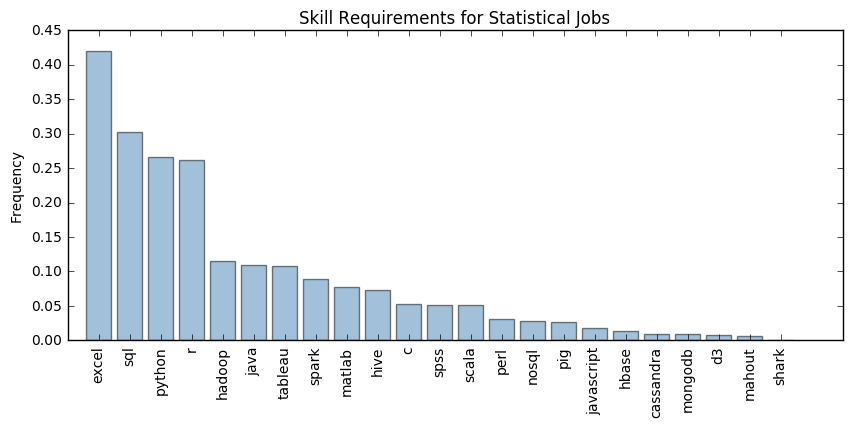

In [117]:
word_barplot(stat_skills.sort_index())

Since we two are very familiar with our own majors, in our next step, we only dug into the unique skill set for statistic major.  After some research, we generated our own key words for statistic major to see which skill is the most important and basic skill we need to learn.

<p>
This is a bar plot showing the portion of jobs requiring each technique. **It can be found that “excel”, “sql”, “python”,“r” are the top four skills which are largely required by companies. In later sections, we also compared skill sets of different salary level.**

<hr></hr>
<font color='blue' size = 3> Below are some related experiments.</font>
<hr></hr>

#### Bar Plot Word Frequency
Note: Only word frequency higher than 0.1 are considered here

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


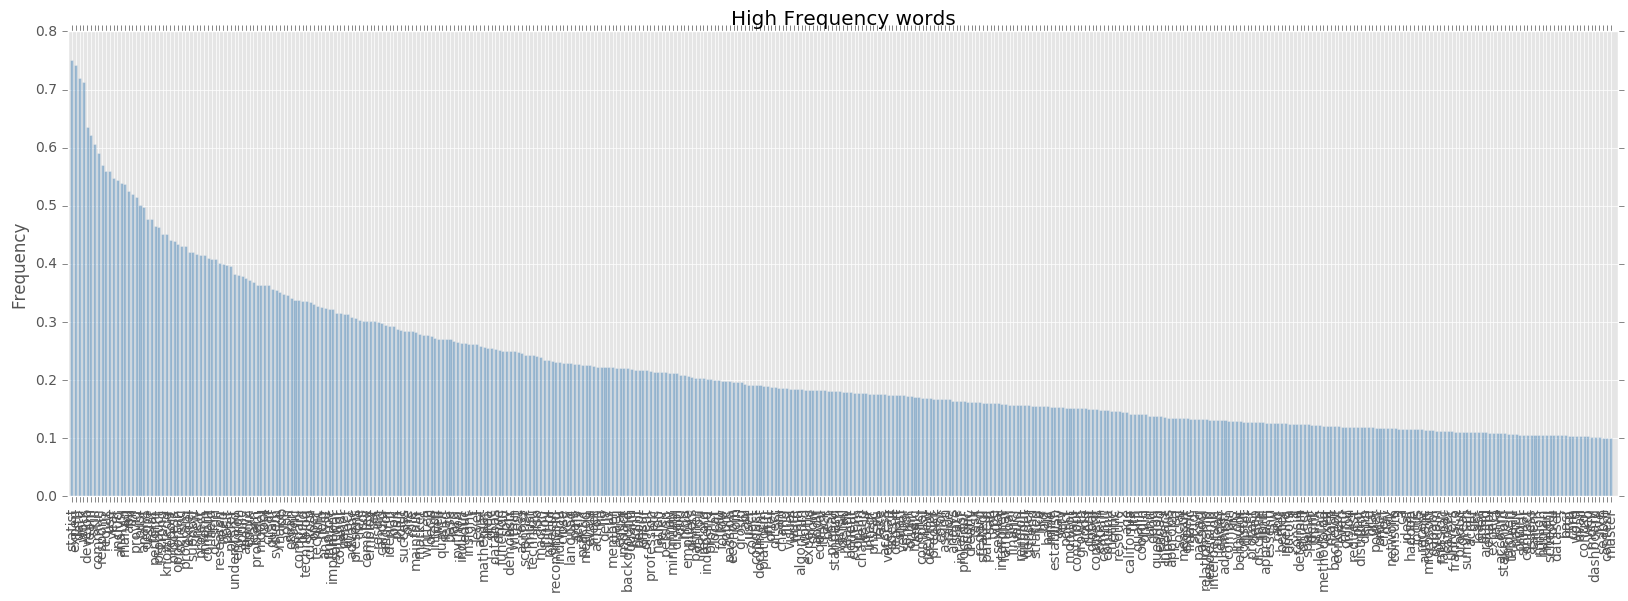

In [130]:
word_barplot(skills_stat_1[skills_stat_1['percent'] > 0.1])
word_barplot(skills_che_1[skills_che_1['percent'] > 0.1])
word_barplot(skills_mse_1[skills_mse_1['percent'] > 0.1])

<hr></hr>
<font color='blue' size = 3> End of experiments.</font>
<hr></hr>

### Word cloud of job descriptions across majors

We generated the word clouds to get a general idea of the high frequent words in the job description for different majors.

In [45]:
def word_cloud(kw_list):
    '''This function generate the word cloud of the list of skill in a dataframe
    '''
    kw_list = kw_list[kw_list['percent'] > 0.1]
    text = []

    for i in range(len(kw_list)):
        text.append((kw_list['word'][i] + ' ')*kw_list['# of posts'][i])
    text = ''.join(text)
    
    plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    text_wordcloud = WordCloud().generate(text)
    plt.imshow(text_wordcloud)
    plt.axis("off")
    
    #plt.savefig('wordcloud_stat.png')
    
    plt.show()
    

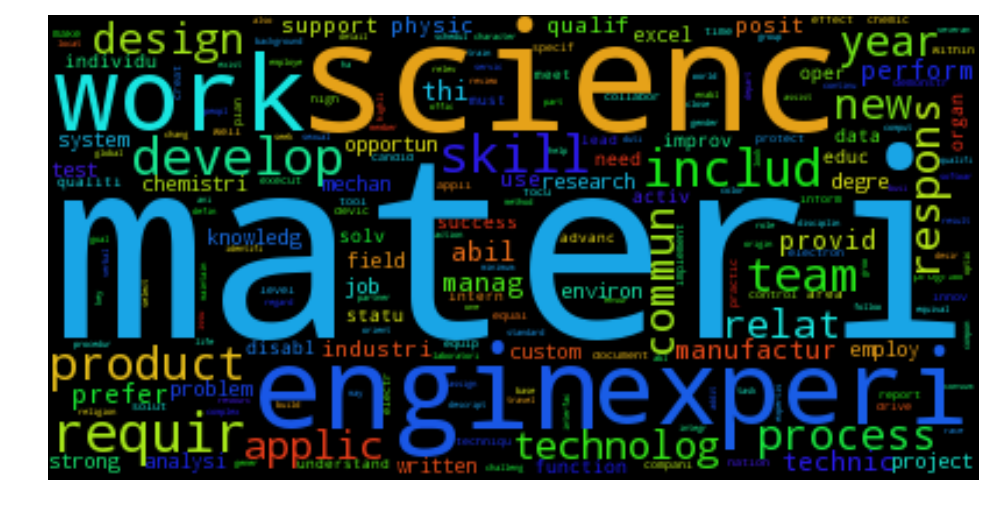

In [132]:
word_cloud(skills_stat_1)
word_cloud(skills_che_1)
word_cloud(skills_mse_1)

Another question we would like to answer is “What is the common skills shared by different majors? And what are the unique skill sets of each major?”
<p>
Above are oen of our findings. We plotted the word clouds generated from the job description of different majors to get a glimpse of the difference of these three majors. We can see a significant difference among different majors. However, simply from these word clouds, it is hard to see the common and unique skill sets required.


<font color = 'tomato' size = 3 >**skills_stat_high**</font> is a data frame with words with frequency > 0.1

In [133]:
skills_stat_high = skills_stat_1[skills_stat_1['percent'] > 0.1]
skills_che_high = skills_che_1[skills_che_1['percent'] > 0.1]
skills_mse_high = skills_mse_1[skills_mse_1['percent'] > 0.1]

The following codes are trying to figure out the shared skills across different major

In [134]:
stat_union_che = list(set(list(skills_stat_high['word'])).union(list(skills_che_high['word'])))
stat_union_mse = list(set(list(skills_stat_high['word'])).union(list(skills_mse_high['word'])))
che_union_mse = list(set(list(skills_che_high['word'])).union(list(skills_mse_high['word'])))

In [135]:
print (len(stat_union_che))
print (len(stat_union_mse))
print (len(che_union_mse))

492
480
457


In [136]:
stat_intersect_che = list(set(list(skills_stat_high['word'])).intersection(list(skills_che_high['word'])))
stat_intersect_mse = list(set(list(skills_stat_high['word'])).intersection(list(skills_mse_high['word'])))
che_intersect_mse = list(set(list(skills_che_high['word'])).intersection(list(skills_mse_high['word'])))

In [137]:
print (len(stat_intersect_che))
print (len(stat_intersect_mse))
print (len(che_intersect_mse))

317
316
332


In [138]:
stat_intersect_che_intersect_mse = list(set(stat_intersect_che).intersection(stat_intersect_mse))

In [139]:
print (len(stat_intersect_che_intersect_mse))

298


In [140]:
print (len(list(skills_stat_high['word'])))
print (len(list(skills_che_high['word'])))
print (len(list(skills_mse_high['word'])))

408
401
388


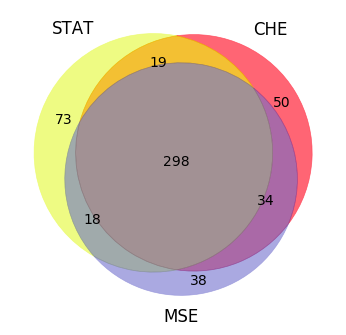

In [371]:
c = venn3(subsets = (73, 50, 19, 38, 18, 34, 298), set_labels = ('STAT', 'CHE', 'MSE'))
c.get_patch_by_id('100').set_color('#eafb65')
c.get_patch_by_id('010').set_color('#ff3f52')
c.get_patch_by_id('001').set_color('#9594da')
c.get_patch_by_id('101').set_color('#899597')
c.get_patch_by_id('110').set_color('#f0b100')
c.get_patch_by_id('011').set_color('#954492')
c.get_patch_by_id('111').set_color('#8b767a')

c.get_patch_by_id('100').set_alpha(.8)
c.get_patch_by_id('010').set_alpha(.8)
c.get_patch_by_id('001').set_alpha(.8)
c.get_patch_by_id('101').set_alpha(.8)
c.get_patch_by_id('110').set_alpha(.8)
c.get_patch_by_id('011').set_alpha(.8)
c.get_patch_by_id('111').set_alpha(.8)

In [142]:
# stat_intersect_che_intersect_mse
#[w for w in stat_intersect_che if w not in stat_intersect_che_intersect_mse]
#[w for w in stat_intersect_mse if w not in stat_intersect_che_intersect_mse]
#[w for w in che_intersect_mse if w not in stat_intersect_che_intersect_mse]

* STAT ^ CHE
<br> 'health', 'autom', 'monitor', 'util', 'assess', 'larg', 'approach', 'vision', 'type', 'summari', 'leader'
* STAT ^ MSE
<br> 'expert', 'access', 'strateg', 'power', 'collect', 'creativ', 'passion', 'dynam', 'consum'
* CHE ^ MSE
<br> 'chemic', 'scientif', 'personnel', 'transfer', 'chemistri', 'lab', 'cross-funct', 'mechan', 'complianc', 'devic', 'travel', 'commerci', 'laboratori', 'facil', 'hands-on', 'equip', 'novel', 'character', 'electr', 'safeti', 'manufactur'

In [143]:
len(['comput','strategi','process','analyz','model','document', 'verbal','independ', 'softwar', 'physic', 'challeng', 
     'team', 'supervis', 'collabor', 'offic', 'optim', 'coordin', 'assist', 'task', 'motiv', 'excel',
     'r', 'test', 'operi', 'interact', 'protect', 'innov', 'talent', 'control', 'program', 'interperson'])

31

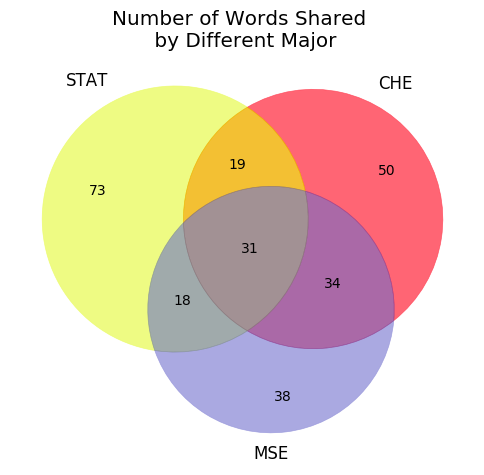

In [370]:
plt.figure(figsize = (6,6))
c = venn3(subsets = (73, 50, 19, 38, 18, 34, 31), set_labels = ('STAT', 'CHE', 'MSE'))

c.get_patch_by_id('100').set_color('#eafb65')
c.get_patch_by_id('010').set_color('#ff3f52')
c.get_patch_by_id('001').set_color('#9594da')
c.get_patch_by_id('101').set_color('#899597')
c.get_patch_by_id('110').set_color('#f0b100')
c.get_patch_by_id('011').set_color('#954492')
c.get_patch_by_id('111').set_color('#8b767a')

c.get_patch_by_id('100').set_alpha(.8)
c.get_patch_by_id('010').set_alpha(.8)
c.get_patch_by_id('001').set_alpha(.8)
c.get_patch_by_id('101').set_alpha(.8)
c.get_patch_by_id('110').set_alpha(.8)
c.get_patch_by_id('011').set_alpha(.8)
c.get_patch_by_id('111').set_alpha(.8)

plt.title('Number of Words Shared \n by Different Major')
plt.savefig('Venn Figure of Shared Words.pdf')

### Conclusion on Skills
<ol>
    <li> The common words shared by all three majors are **comput(e), strategi, process, analyz, model, document, verbal, independ(ent), softwar(e), physic, challeng(e), team, supervis(e), collabor(ation), offic(e), optim(al), coordin(ation), assist, task, motiv(ative), excel, r, test, operi(ation), interact(ion), protect, innov(ation), talent, control, program, interperson**.
    <li> Words share by **Stat** and **CHE** are **health, autom, monitor, util, assess, larg, approach, vision, type, summari, leader**.
    <li> Words share by **Stat** and **MSE** are **expert, access, strateg, power, collect, creativ, passion, dynam, consum**
    <li> Words share by **CHE** and **MSE** are **chemic(al), scientif(ic), personnel, transfer, chemistri, lab, cross-funct, mechan(ical), complianc(e), devic(e), travel, commerci(al), laboratori, facil(itate), hands-on, equip(ment), novel(ty), character, electr(ic), safeti, manufactur(e)**.
</ol>

So we then made a further comparison to see how many words were shared by these majors and how many unique words they have?
<p>
Here is the result presented in a venn diagram. There are 31 important words shared by these majors. These words are more likely to be a general requirement of jobs. Actually they can be classified into two categories, one is the words related to personal characteristics, like “Independent, collaboration, coordination and etc. Another category is the fundamental technique requirements such as “excel”, “r”, and “software”.
<p>
We also did the pairwise comparison between each two majors. There are about the same number of words shared by statistics and other two majors. And there is a large overlap between CHE and MSE. It is not surprising to find these two majors are closely related. Actually they were a single department last year. 

<hr></hr>
<font color='blue' size = 3> Below are some related experiments.</font>
<hr></hr>

## By using subtitles

### Strategy for Extracting Qualifications
<ol>
    <li> compare all subtitles and find out which subtitles are "Qualifications" (__qualif, requir, experi, skill__)
    <li> split text by using subtitles
    <li> compare the word in qualifications and analyze
    
</ol>

In [145]:
# get subtitles inside job description
def get_subtitle(post):
    """
    This function takes the post of each job and get all subtitles of the post
    Input: post in html format
    Output: a list of subtitles
    """
    post = BeautifulSoup(post, "lxml")
    try:
        temp = post.find_all('b')        
        subtitles = [sub.text for sub in temp]
    except AttributeError:
        subtitles = []
    return subtitles

In [146]:
# a list containing the subtitles of each post
subtitles_stat = [get_subtitle(post) for post in list(summary_stat['description'])]
subtitles_che = [get_subtitle(post) for post in list(summary_stat['description'])]
subtitles_mse = [get_subtitle(post) for post in list(summary_stat['description'])]

In [147]:
def diction(files):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a data frame
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = ' '.join(files[i])
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [148]:
def key_sub(subtitles):
    # Lemmata of subtitles and the id of posts containing that Lemmata
    sub_id = diction(subtitles)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    sub_num = {key:len(set(val)) for key,val in sub_id.items()}

    # Sort sub_num
    sorted_sub = [(key, sub_num[key]) for key in sorted(sub_num, key=lambda x : sub_num[x],
                                                                  reverse=True)]
    df_sorted_sub = pd.DataFrame(sorted_sub)
    df_sorted_sub.columns = ['word', '# of posts']
    return df_sorted_sub.iloc[:100,:]

In [149]:
# customized stop words generated from subtitles
stop_sub_stat = list(key_sub(subtitles_stat)['word'])
stop_sub_che = list(key_sub(subtitles_che)['word'])
stop_sub_mse = list(key_sub(subtitles_mse)['word'])

In [150]:
def diction_qual_2(files, stop_major):
    """
    Returns a dictionary from lemmata to document ids containing that lemma
    Input is a list of job description text
    Output is a dictionary with lemmata as key and document ids as values
    """
    textd = {} 
    for i in range(len(files)):
        # loop over each raw text
        t = files[i]
        # return unique and order list of words appeared in the raw text
        s = set(lemmatize(t))- stop - set(string.punctuation) - set(stop_major)
        try:
            toks = toks | s   # append to "toks" set a "s"
        except NameError:
            toks = s    # if doesn't exsit, initialize it
        for tok in s:
            try:
                textd[tok].append(i)
            except KeyError:
                textd[tok] = [i]
    
    return textd

In [151]:
def skills(df, stop_major):
    
    job_des = list(df['description'])
    n = len(job_des)
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]

    # Lemmata of subtitles and the id of posts containing that Lemmata
    text_id =diction_qual_2(job_text, stop_major)

    # Lemmata of subtitles and the number of posts containing that Lemmata
    text_num = {key:len(set(val)) for key,val in text_id.items()}
    # Sort text_num
    sorted_text = [(key, text_num[key]) for key in sorted(text_num, key=lambda x : text_num[x],
                                                                  reverse=True)]
    df_sorted_text = pd.DataFrame(sorted_text)
    df_sorted_text.columns = ['word', '# of posts']
    df_sorted_text['percent'] = df_sorted_text['# of posts']/n
    
    return df_sorted_text

In [152]:
skills_stat_2 = skills(summary_stat, stop_sub_stat)
skills_che_2 = skills(summary_che, stop_sub_che)
skills_mse_2 = skills(summary_mse, stop_sub_mse)

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


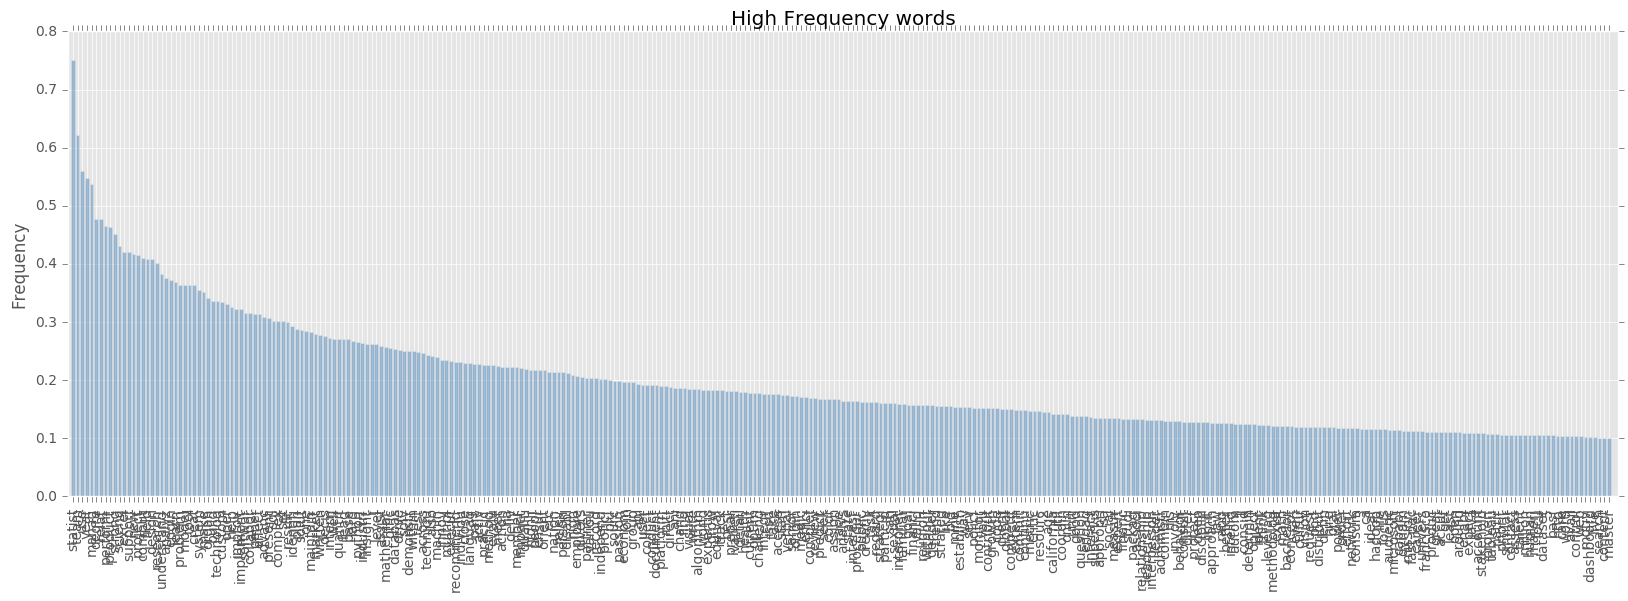

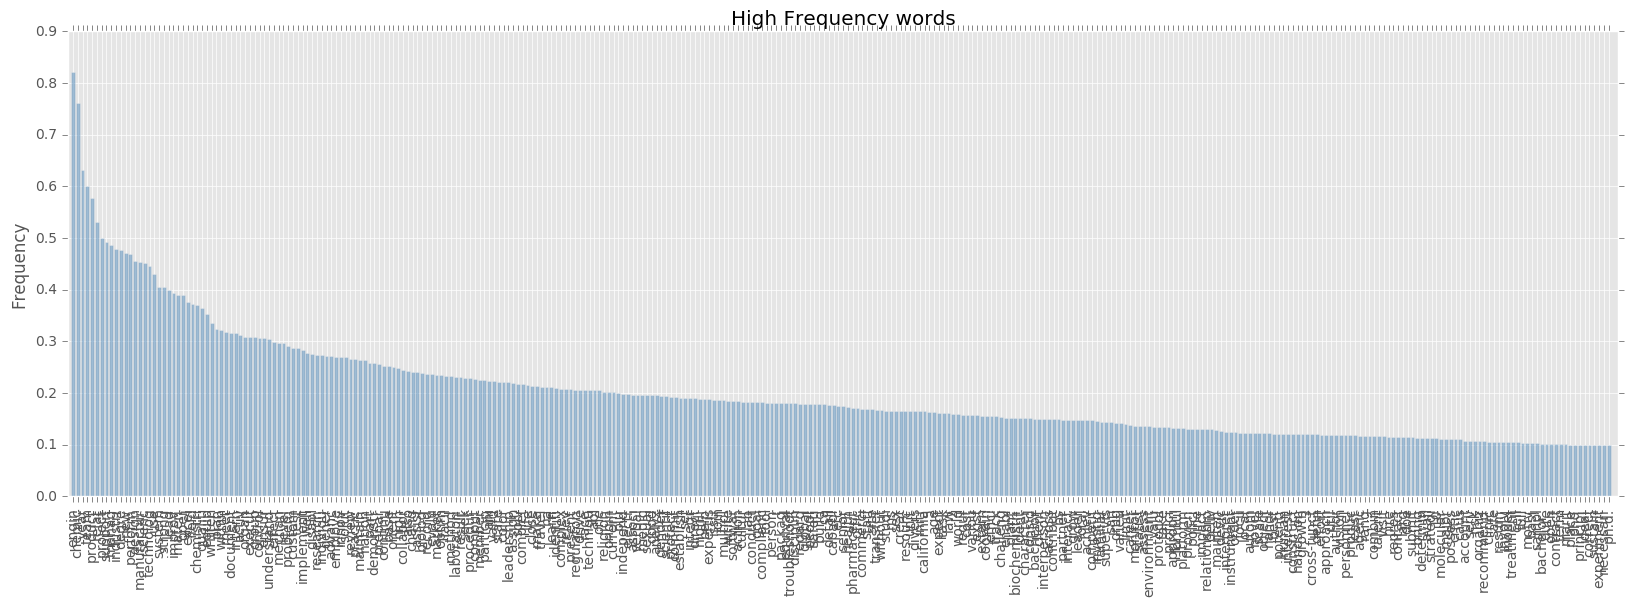

In [153]:
word_barplot(skills_stat_2)
word_barplot(skills_che_2)
word_barplot(skills_mse_2)

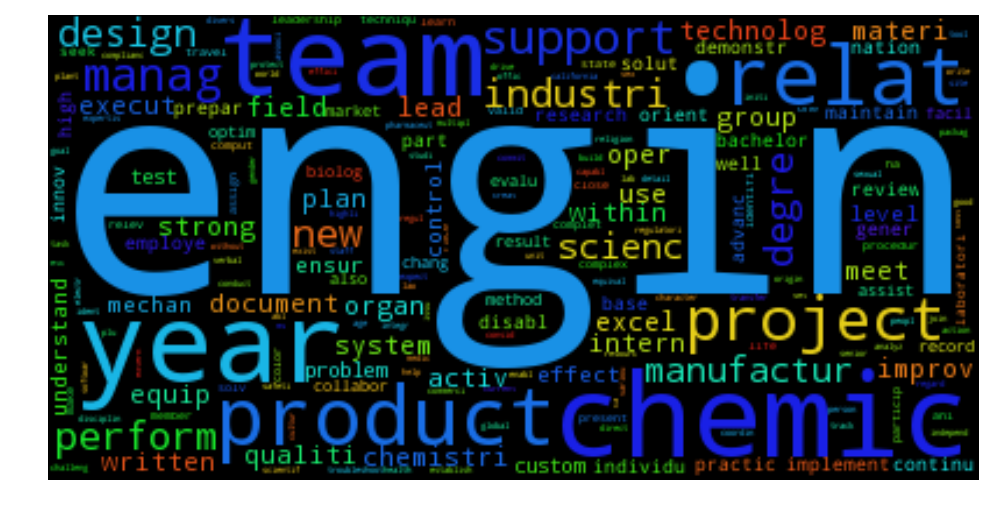

In [154]:
word_cloud(skills_stat_2)
word_cloud(skills_che_2)
word_cloud(skills_mse_2)

<hr></hr>
<font color='blue' size = 3> End of experiments.</font>
<hr></hr>

# PART 2 Degree Requirement

In [46]:
def degree_require(text):
    '''This function finds whether graduate degree is required in a job description
    Output: scaler of 1 --- requires graduate degree
                      0 --- no requirement for graduate degree
    '''
    kw = ['graduate', 'm.s.', "master's", "phd", "ph.d", "phd's", "ph.d's"]
    result = 'undergrad'
    for word in kw:
        if word in text:
            result = 'graduate'
            break
        break
    return result

In [47]:
def degree_list(df):
    job_des = list(df['description'])
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]
    degree_list = []
    for job in job_text:
        degree_list = degree_list + [degree_require(job)]
    
    return degree_list

In [48]:
# full-time
summary_stat = pd.read_csv('Jobdescription/summary_stat.csv')
summary_che = pd.read_csv('Jobdescription/summary_che.csv')
summary_mse = pd.read_csv('Jobdescription/summary_mse.csv')

degree_list_stat = degree_list(summary_stat)
degree_list_che = degree_list(summary_che)
degree_list_mse = degree_list(summary_mse)

# internship
summary_stat_intern = pd.read_csv('Jobdescription/summary_stat_intern.csv')
summary_che_intern = pd.read_csv('Jobdescription/summary_che_intern.csv')
summary_mse_intern = pd.read_csv('Jobdescription/summary_mse_intern.csv')

degree_list_stat_intern = degree_list(summary_stat_intern)
degree_list_che_intern = degree_list(summary_che_intern)
degree_list_mse_intern = degree_list(summary_mse_intern)

In [49]:
def degree_analysis(degree_stat, degree_che, degree_mse, degree_stat_intern, degree_che_intern, degree_mse_intern):
    '''This function draws a bar plot that compares the degree requirements of the majors,
    and returns a dataframe of the degree requirement summary
    '''
    df_stat = pd.DataFrame({'major': 'statistics',
                            'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                            'Count': [degree_stat.count('undergrad'), 
                                      degree_stat.count('graduate')],
                            'Percent': [degree_stat.count('undergrad')/len(degree_stat), 
                                        degree_stat.count('graduate')/len(degree_stat)]})
    
    df_stat_intern = pd.DataFrame({'major': 'statistics',
                            'Degree': ['intern_undergrad', 'intern_graduate'], 
                            'Count': [degree_stat_intern.count('undergrad'), 
                                        degree_stat_intern.count('graduate')],
                            'Percent': [degree_stat_intern.count('undergrad')/len(degree_stat_intern), 
                                        degree_stat_intern.count('graduate')/len(degree_stat_intern)]})
    
    df_che = pd.DataFrame({'major': 'chemical engineering',
                           'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                           'Count': [degree_che.count('undergrad'), 
                                       degree_che.count('graduate')],
                           'Percent': [degree_che.count('undergrad')/len(degree_che), 
                                       degree_che.count('graduate')/len(degree_che)]})
    
    df_che_intern = pd.DataFrame({'major': 'chemical engineering',
                           'Degree': ['intern_undergrad', 'intern_graduate'], 
                           'Count': [degree_che_intern.count('undergrad'), 
                                       degree_che_intern.count('graduate')],
                           'Percent': [degree_che_intern.count('undergrad')/len(degree_che_intern), 
                                       degree_che_intern.count('graduate')/len(degree_che_intern)]})
    
    df_mse = pd.DataFrame({'major': 'materials science',
                           'Degree': ['fulltime_undergrad', 'fulltime_graduate'], 
                           'Count': [degree_mse.count('undergrad'), 
                                       degree_mse.count('graduate')],
                           'Percent': [degree_mse.count('undergrad')/len(degree_mse), 
                                       degree_mse.count('graduate')/len(degree_mse)]})
    
    df_mse_intern = pd.DataFrame({'major': 'materials science',
                           'Degree': ['intern_undergrad', 'intern_graduate'], 
                           'Count': [degree_mse_intern.count('undergrad'),
                                       degree_mse_intern.count('graduate')],
                           'Percent': [degree_mse_intern.count('undergrad')/len(degree_mse_intern),
                                       degree_mse_intern.count('graduate')/len(degree_mse_intern)]})
    
    df_join = pd.concat([df_stat, df_stat_intern, df_che, df_che_intern, df_mse, df_mse_intern], ignore_index = True)
    
    plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    wd = 0.05
    
    full_under_color = 'firebrick'
    full_grad_color = 'tomato'
    intern_under_color = 'steelblue'
    intern_grad_color = 'lightskyblue'
    

    stat1 = plt.bar(0.25, df_stat['Count'][0], width = wd, color = full_under_color, label = "full-time: undergrad")
    stat2 = plt.bar(0.25, df_stat['Count'][1], bottom = df_stat['Count'][0], 
                    width = wd, color = full_grad_color, label = "full-time: graduate")
    
    stat3 = plt.bar(0.31, df_stat_intern['Count'][0], width = wd, color = intern_under_color, label = "internship: undergrad")
    stat4 = plt.bar(0.31, df_stat_intern['Count'][1], bottom = df_stat_intern['Count'][0], 
                    width = wd, color = intern_grad_color, label = "internship: graduate")
    
    plt.legend()
    
    che1 = plt.bar(0.5, df_che['Count'][0], width = wd, color = full_under_color, label = "undergrad")
    che2 = plt.bar(0.5, df_che['Count'][1], bottom = df_che['Count'][0], 
                    width = wd, color = full_grad_color, label = "graduate")
    che3 = plt.bar(0.56, df_che_intern['Count'][0], width = wd, color = intern_under_color, label = "undergrad")
    che4 = plt.bar(0.56, df_che_intern['Count'][1], bottom = df_che_intern['Count'][0], 
                    width = wd, color = intern_grad_color, label = "graduate")
    
    mse1 = plt.bar(0.75, df_mse['Count'][0], width = wd, color = full_under_color, label = "undergrad")
    mse2 = plt.bar(0.75, df_mse['Count'][1], bottom = df_mse['Count'][0], 
                    width = wd, color = full_grad_color, label = "graduate")
    mse3 = plt.bar(0.81, df_mse_intern['Count'][0], width = wd, color = intern_under_color, label = "undergrad")
    mse4 = plt.bar(0.81, df_mse_intern['Count'][1], bottom = df_mse_intern['Count'][0], 
                    width = wd, color = intern_grad_color, label = "graduate")
    
    plt.xticks([0.28, 0.53, 0.78], ["statistics", "chemical engineering", "materials science"])
    plt.title('Degree requirement')

    plt.ylabel('Number of job posts')
    plt.savefig('Degree requirement comparison')
    plt.show()
    
    return df_join

In [57]:
degree_number_df = degree_analysis(degree_list_stat, degree_list_che, degree_list_mse, 
                degree_list_stat_intern, degree_list_che_intern, degree_list_mse_intern)
degree_number_df

Count              Degree   Percent                 major
0     971  fulltime_undergrad  0.947317            statistics
1      54   fulltime_graduate  0.052683            statistics
2     183    intern_undergrad  0.734940            statistics
3      66     intern_graduate  0.265060            statistics
4     537  fulltime_undergrad  0.927461  chemical engineering
5      42   fulltime_graduate  0.072539  chemical engineering
6      73    intern_undergrad  0.701923  chemical engineering
7      31     intern_graduate  0.298077  chemical engineering
8     320  fulltime_undergrad  0.922190     materials science
9      27   fulltime_graduate  0.077810     materials science
10    151    intern_undergrad  0.650862     materials science
11     81     intern_graduate  0.349138     materials science

Now let’s see if graduates have any advantages in the job market. 
<p>
To answer this question, we plotted the number of jobs of different degrees. The red bars correspond to fulltime jobs and the blue ones are internship. And the darker part in each bar shows the number of jobs only requiring Bachelors degree. </p>
<p>
Similar patterns can be seen across these three majors. It can be easily found that the majority of the jobs only require a Bachelors degree. For internships, the percentage of graduate is slightly higher. It is interesting to find that there is high demand for graduate students for internships of Materials Science. One wild guess could be that these companies know that graduate students in Materials couldn’t find a job and they tend to hire them with low salary for internships.</p>


Source of data: [National Center of Education Statistics](https://nces.ed.gov/fastfacts/display.asp?id=37)

|      | Undergraduate | Graduate   |
|------|---------------|------------|
|Stat  | 21,853|9,390|
|Eng|97,858|56,354|

In [338]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

col = '#7cad9a','#315e4a'
jobcol = '#efa35f', '#d0702a'

labels = 'Graduate', 'Undergrate'
sizes = [9390, 21853]
explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=-45, colors=col)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Statistics Major')

sizes = [54+66, 971+183]
explode = (0.1, 0.1)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=-45, colors=jobcol)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Statistics Job Demand')

sizes = [56354, 97858]
explode = (0.1, 0.1) 
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=-45, colors=col)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('Engineer Major')

sizes = [181, 793]
explode = (0.1, 0.1) 
ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=-45, colors=jobcol)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title('Engineer Job Demand')

plt.savefig('degree_populations.png')

plt.show()

Also, we compared the population of undergrad and gradates and their demands. The population data of statistic major and engineering majors come from the National Center for Education Statistics. They are data of the entire US in 2014 to 2015 academic year. And the job demand data were obtained from Indeed website and only California. Since the data are not on the same page in terms of time and locations, we only compared the percentage of different degrees. Assuming the california data is representative for the entire nation, we made these two sets of pie charts to see the percentage of population and their demands. As we can see, the percentage of undergrad is larger in population than that in the job market. This indicates that it might be easier for undergrads to find a job. However, another possible reason is that people with higher education levels may prefer to continue their career in academia rather than industry.

## PART 3 Salary

In [91]:
def find_salary(text):
    '''This function finds salary in a job description
    Output: value of the salary
    '''
    import re
    regex = re.compile(r'^\$([1-9]{1}[\d]{0,2}(\,[\d]{3})*(\.[\d]{0,2})?|[1-9]{1}[\d]{0,}(\.[\d]{0,2})?|0(\.[\d]{0,2})?|(\.[\d]{1,2})?)$')
    
    words = re.split(' ',text)
    words = [w for w in words if regex.search(w)]

    try: 
        result = words[0]
    except IndexError:
        result = 'Not Found'
   
    return result

In [92]:
def salary_list(df):
    job_des = list(df['description'])
    job_text = [BeautifulSoup(job, "lxml").text for job in job_des]
    salary_list = []
    for job in job_text:
        salary_list = salary_list + [find_salary(job)]
    
    return salary_list

In [95]:
salary_list_stat = salary_list(summary_stat)
salary_list_che = salary_list(summary_che)
salary_list_mse = salary_list(summary_mse)

In [96]:
job_ca_stat = pd.read_csv('Joblist/job_ca_statistics.csv')
url_stat = list(job_ca_stat['url'])
job_ca_che = pd.read_csv('Joblist/job_ca_chemical engineering.csv')
url_che = list(job_ca_che['url'])
job_ca_mse = pd.read_csv('Joblist/job_ca_materials science.csv')
url_mse = list(job_ca_mse['url'])

In [185]:
import requests
import requests_cache
requests_cache.install_cache("cache")
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
def salary_text(url):
    """
    This function extracts information of one post by taking a url as input
    Output is a dictionary with job title, company name, and description of the job.
    """
    post_doc = requests.get(url).content
    post = BeautifulSoup(post_doc, 'html.parser')
    temp = post.find_all('span')
    result = [t.text for t in temp]
    result = ' '.join(result)
    return result

In [97]:
#salary_text_stat = [salary_text(url) for url in url_stat]
salary_text_stat = list(pd.read_csv('salary/salary_stat.csv')['0'])
salary_list_stat_2 = [find_salary(t) for t in salary_text_stat]
#salary_text_che = [salary_text(url) for url in url_che]
salary_text_che = list(pd.read_csv('salary/salary_che.csv')['0'])
salary_list_che_2 = [find_salary(t) for t in salary_text_che]
#salary_text_mse = [salary_text(url) for url in url_mse]
salary_text_mse = list(pd.read_csv('salary/salary_mse.csv')['0'])
salary_list_mse_2 = [find_salary(t) for t in salary_text_mse]

In [98]:
# pd.DataFrame(salary_text_stat).to_csv('salary_stat.csv')
# pd.DataFrame(salary_text_che).to_csv('salary_che.csv')
# pd.DataFrame(salary_text_mse).to_csv('salary_mse.csv')

In [99]:
def combine_salary(lst1, lst2):
    result = lst2
    for i in range(len(lst1)):
        if lst2[i] == 'Not Found':
            result[i] = lst1[i]
    return result

In [100]:
salary_stat = combine_salary(salary_list_stat, salary_list_stat_2)
salary_che = combine_salary(salary_list_che, salary_list_che_2)
salary_mse = combine_salary(salary_list_mse, salary_list_mse_2)

In [101]:
def clean_salary(lst):
    """
    This function takes a list containing the salary strings we parsed from the webpage
    Input example: salary_stat
    Input: a list with salary stored as string, like '$12,000'
    Output: a list of numbers with salary information
    """
    lst_rm_notfound = [re.sub(',','',s[1:]) for s in list(Counter(lst).keys()) if s != 'Not Found']
    lst_num = [float(s) for s in lst_rm_notfound if s != '']
    for i in range(len(lst_num)):
        if lst_num[i] < 1000:
            lst_num[i] = 'nan'
        elif lst_num[i] > 1000 and lst_num[i] <20000:
            lst_num[i] = lst_num[i] * 12.
    return lst_num        

In [152]:
salary_stat_num = clean_salary(salary_stat)
salary_che_num = clean_salary(salary_che)
salary_mse_num = clean_salary(salary_mse)

In [307]:
import statistics
def sal_data(lst):    
    return [np.nanmin(lst),
            np.nanmedian(lst),
            np.nanmax(lst)]

In [351]:
# sal_data(salary_stat_num)
# sal_data(salary_che_num)
# sal_data(salary_mse_num)

In [155]:
salary_stat_num = [np.nan if i == 'nan' else i for i in salary_stat_num]

## Draw Boxplot

In [443]:


def salary_plots(stat_sal_list, che_sal_list, mse_sal_list):
    '''This function takes 3 list of salaries and draws a comparison box plot
    Default input: 'salary_stat_num', 'salary_che_num', 'salary_mse_num'
    '''
    plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    stat = [x for x in salary_stat_num if x is not 'nan']
    che = [x for x in salary_che_num if x is not 'nan']
    mse = [x for x in salary_mse_num if x is not 'nan']

    violin_parts = plt.violinplot([stat, che, mse], showmeans=True)    
    for pc in violin_parts['bodies']:
        pc.set_facecolor('tomato')
    
    
    plt.xlabel(' '*5 + 'statistics' + ' '*40 + 'chemical engineering' + ' '*30 + 'materials science')
    plt.ylabel('Salary distribution')
    plt.xticks([])
    plt.title('Violin plot of salary distributions of different majors')
    plt.savefig('salary_violinplot.png')
    plt.show()

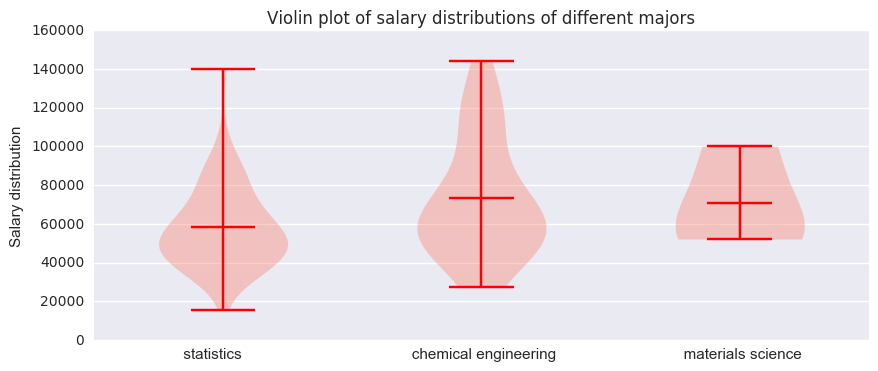

In [444]:
salary_plots(salary_stat_num, salary_che_num, salary_mse_num)

The distribution of the salary levels are very interesting. First of all, the distribution of the stat and chem majors are very similar. The average annual salary is around 70 thousand. Chemical engineers actually earn a little bit more than statisticians in general. For material scientists, it seems that the entry salary level is much higher than the other majors. However, on the other hand, the highest salary level is very limited also. The distribution is pretty narrow and it seems that there is not much space to push up your salary for a material scientist. It’s probably a good idea for Jiewei to pursue a degree in statistics. 
<p>
Also, especially for stat and chem majors, the higher the salary level is, the fewer people there are. 

In [136]:
skill_dict = prog_lang_dict + analysis_tool_dict + hadoop_dict + database_dict
skills_stat_num = [{key: val} for key, val in skills_stat_num.items() if key in skill_dict]

In [158]:
salary_level = pd.qcut(np.array([i for i in salary_stat_num]), 3, labels=["L","M","H"])

In [162]:
L_list = []
M_list = []
H_list = []
for i in range(len(salary_level)):
    if salary_level[i] == 'L':
        L_list.append(i)
    elif salary_level[i] == 'M':
        M_list.append(i)
    elif salary_level[i] == 'H':
        H_list.append(i)
    

In [181]:
set(L_list).intersection([i for i in skills_stat_num[0].values()][0])

{2, 3, 10, 17, 34, 40, 53, 73, 84, 88}

In [213]:
def get_salary_skill(level, dic):
    key = dic.keys()
    val = set(level).intersection([i for i in dic.values()][0])
    l = len(val)
    return (key,l)

In [214]:
salary_skill_final_L = [get_salary_skill(L_list,l) for l in skills_stat_num]
salary_skill_final_M = [get_salary_skill(M_list,l) for l in skills_stat_num]
salary_skill_final_H = [get_salary_skill(H_list,l) for l in skills_stat_num]

In [226]:
salary_skill_final_L[0][0]

dict_keys(['r'])

In [244]:
# SSFLdf: dataframe of salary_skill_final_L
SSFLdf = pd.DataFrame(salary_skill_final_L)
SSFLdf.columns = ['skill', 'freq']
SSFLdf.skill = [str(s).split("'")[1] for s in SSFLdf.skill]
SSFLdf = SSFLdf[SSFLdf.skill not in ['cassandra', 'perl', 'shark', 'mongodb', 'javascript']]
SSFLdf.drop(SSFLdf.index[[7,9,17,18,21]], inplace = True)
SSFLdf.reset_index(inplace=True)

In [280]:
# SSFMdf: dataframe of salary_skill_final_M
SSFMdf = pd.DataFrame(salary_skill_final_M)
SSFMdf.columns = ['skill', 'freq']
SSFMdf.skill = [str(s).split("'")[1] for s in SSFMdf.skill]
SSFMdf.drop(SSFMdf.index[[7,9,17,18,21]], inplace = True)
SSFMdf.reset_index(inplace=True)

In [282]:
# SSFHdf: dataframe of salary_skill_final_H
SSFHdf = pd.DataFrame(salary_skill_final_H)
SSFHdf.columns = ['skill', 'freq']
SSFHdf.skill = [str(s).split("'")[1] for s in SSFHdf.skill]
SSFHdf.drop(SSFHdf.index[[7,9,17,18,21]], inplace = True)
SSFHdf.reset_index(inplace=True)

In [354]:
fig, ax = plt.subplots(figsize = (12, 7))
width = 0.25

plt.bar(SSFLdf.index, SSFLdf.freq, width = width, color = '#FCB711', edgecolor = "none", label = 'Low')
plt.bar(SSFMdf.index + width, SSFMdf.freq, width = width, color = '#F37021', edgecolor = "none", label = 'Median')
plt.bar(SSFHdf.index + 2*width, SSFHdf.freq, width = width, color = '#CC004C', edgecolor = "none", label = 'High')
plt.legend(loc = 'best')

plt.xticks(SSFLdf.index + width, SSFLdf.skill, rotation = 90)
plt.xlim([0,13])
plt.yticks([])
plt.xlabel('Skill set')
plt.ylabel('Freq')

plt.savefig('Skill Salary Bar Plot.png')

plt.show()



So the next question is how can you earn more? Is there any particular skill that can boost your salary level?
<p>
Unfortunately, there is no quick answer to this question. We equally differentiated the job posts according to the annual salary they offer. The high salary jobs are indicated by the red bars, and the jobs in the lowest job salary level group are represented by the lightest color. The most popular skill set including r, python, and hadoop, basically the content of the 141abc course series, are all commonly required regardless of the salary level. Some other skills are required by some jobs but not the others. </p>
<p>
We believe there should be some correlation between the skill set and the salary level. But we did not find any particular skill that is special for the high salary level group. One possible reason is the data limitation. Not all the job posts would specify the salary level, and only about 10% of the job posts we scraped provided the salary information. The sample size is relatively small to begin with. Another hypothesis is that it may be the size of your skill set, instead of a special skill, that determines your salary level. </p>


## Map

Static and interactive maps are generated to compare the company locations.

In [57]:
job_ca_statistics = pd.read_csv('Joblist/job_ca_statistics.csv')
job_ca_che = pd.read_csv('Joblist/job_ca_chemical engineering.csv')
job_ca_mse = pd.read_csv('Joblist/job_ca_materials science.csv')

In [340]:
import folium

m = folium.Map(location = [37.8, -122.3], zoom_start = 11)

for name, com, lon, lat in job_ca_statistics[['jobtitle','company','longitude','latitude']].itertuples(index = False):
    nam_co = name+', '+com
    folium.Marker([lat, lon], popup = nam_co, icon = folium.Icon(color ='salmon')).add_to(m)

fig = folium.Figure(width = 800, height = 400)
fig.add_child(m)

In [341]:
# m.save('Statistics.html')

In [343]:
import folium

m = folium.Map(location = [37.8, -122.3], zoom_start = 11)

for name, com, lon, lat in job_ca_che[['jobtitle','company','longitude','latitude']].itertuples(index = False):
    nam_co = name+', '+com
    folium.Marker([lat, lon], popup = nam_co, icon = folium.Icon(color ='green')).add_to(m)

fig = folium.Figure(width = 800, height = 400)
fig.add_child(m)

In [344]:
m.save('Chemical_Engineering.html')

In [346]:
import folium

m = folium.Map(location = [37.8, -122.3], zoom_start = 11)

for name, com, lon, lat in job_ca_mse[['jobtitle','company','longitude','latitude']].itertuples(index = False):
    nam_co = name+', '+com
    folium.Marker([lat, lon], popup = nam_co).add_to(m)

fig = folium.Figure(width = 800, height = 400)
fig.add_child(m)

In [347]:
m.save('Materials_Science.html')

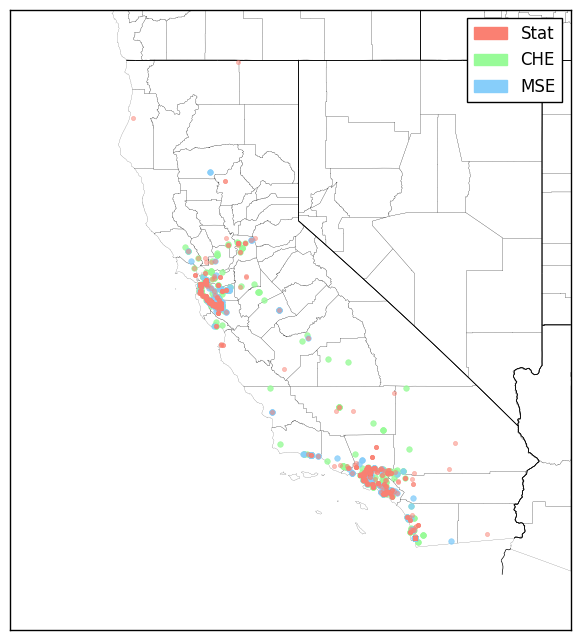

In [80]:
plt.figure(figsize=(10,8))
my_map = Basemap(llcrnrlon=-127.06, llcrnrlat=30.81, urcrnrlon=-113.34, urcrnrlat=42.90, resolution="h",
    projection="merc")

my_map.drawstates()
my_map.readshapefile("CA/cb_2015_us_county_500k", "city", linewidth=0.1)

x2, y2 = my_map(job_ca_che.longitude.values, job_ca_che.latitude.values)
my_map.plot(x2, y2, ".", color = 'palegreen', markersize = 8, alpha = .8)

x3, y3 = my_map(job_ca_mse.longitude.values, job_ca_mse.latitude.values)
my_map.plot(x3, y3, ".", color = 'lightskyblue', markersize = 8, alpha = .8)

x, y = my_map(job_ca_statistics.longitude.values, job_ca_statistics.latitude.values)
my_map.plot(x, y, ".", color = 'salmon', markersize = 6, alpha = .5)

stat_patch = mpatches.Patch(color='salmon', label='Stat')
che_patch = mpatches.Patch(color='palegreen', label='CHE')
mse_patch = mpatches.Patch(color='lightskyblue', label='MSE')

plt.legend(handles=[stat_patch, che_patch,mse_patch])

plt.savefig('LocationofJobs.png')

Each dot on the map represents a company, and the colors of the dots distinguish the three majors. Not surprisingly, there are two clusters on the map, one is at the silicon valley, and the other is around LA. Another interesting observation is that the stat companies are more closely centered at these two locations, whereas the chem and ms companies are more widely distributed.

## Temporal Distribution

In [76]:
job_ca_statistics['date_reformat'] = pd.DatetimeIndex(job_ca_statistics['date'])
job_ca_statistics['month'] = pd.DatetimeIndex(job_ca_statistics['date']).month
groups_stat = job_ca_statistics.groupby('month')

job_ca_che['date_reformat'] = pd.DatetimeIndex(job_ca_che['date'])
job_ca_che['month'] = pd.DatetimeIndex(job_ca_che['date']).month
groups_che = job_ca_che.groupby('month')

job_ca_mse['date_reformat'] = pd.DatetimeIndex(job_ca_mse['date'])
job_ca_mse['month'] = pd.DatetimeIndex(job_ca_mse['date']).month
groups_mse = job_ca_mse.groupby('month')


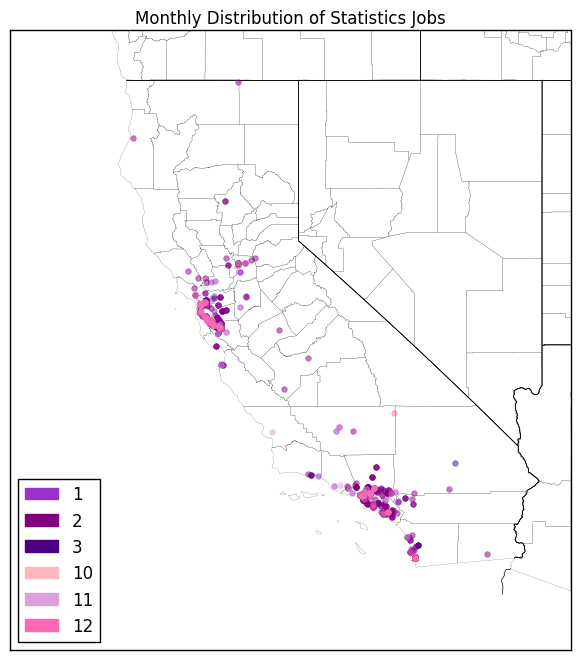

In [316]:
plt.figure(figsize=(10,8))
my_map = Basemap(llcrnrlon=-127.06, llcrnrlat=30.81, urcrnrlon=-113.34, urcrnrlat=42.90, resolution="h",
    projection="merc")

my_map.drawcountries()
my_map.drawstates()
my_map.readshapefile("CA/cb_2015_us_county_500k", "city", linewidth=0.1)

cols = ["darkorchid", "purple", "indigo", "lightpink", "plum", "hotpink"]
i = 0
patch = []
for name, group in groups_stat:
    x, y = my_map(group.longitude.values, group.latitude.values)
    my_map.plot(x, y, ".", color = cols[i], markersize = 8, alpha = .5)
    patch = patch + [mpatches.Patch(color=cols[i], label=name)]
    i += 1

plt.legend(handles=patch,loc ='lower left')
plt.title('Monthly Distribution of Statistics Jobs')

plt.savefig('Monthly Distribution of Statistics Jobs.png')

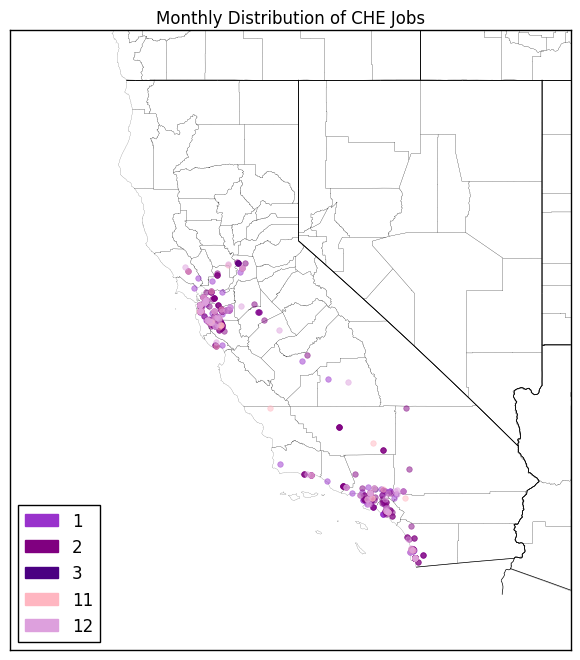

In [319]:
plt.figure(figsize=(10,8))
my_map = Basemap(llcrnrlon=-127.06, llcrnrlat=30.81, urcrnrlon=-113.34, urcrnrlat=42.90, resolution="h",
    projection="merc")

my_map.drawcountries()
my_map.drawstates()
my_map.readshapefile("CA/cb_2015_us_county_500k", "city", linewidth=0.1)

cols = ["darkorchid", "purple", "indigo", "lightpink", "plum", "hotpink"]
i = 0
patch = []
for name, group in groups_che:
    x, y = my_map(group.longitude.values, group.latitude.values)
    my_map.plot(x, y, ".", color = cols[i], markersize = 8, alpha = .5)
    patch = patch + [mpatches.Patch(color=cols[i], label=name)]
    i += 1

plt.legend(handles=patch,loc ='lower left')
plt.title('Monthly Distribution of CHE Jobs')

plt.savefig('Monthly Distribution of CHE Jobs.png')

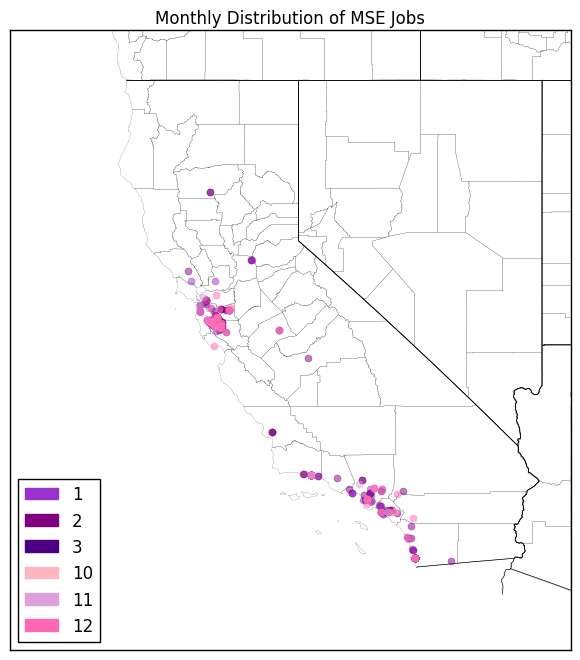

In [320]:
plt.figure(figsize=(10,8))
my_map = Basemap(llcrnrlon=-127.06, llcrnrlat=30.81, urcrnrlon=-113.34, urcrnrlat=42.90, resolution="h",
    projection="merc")

my_map.drawcountries()
my_map.drawstates()
my_map.readshapefile("CA/cb_2015_us_county_500k", "city", linewidth=0.1)

cols = ["darkorchid", "purple", "indigo", "lightpink", "plum", "hotpink"]

i = 0
patch = []
for name, group in groups_mse:
    x, y = my_map(group.longitude.values, group.latitude.values)
    my_map.plot(x, y, ".", color = cols[i], markersize = 10, alpha = .5)
    patch = patch + [mpatches.Patch(color=cols[i], label=name)]
    i += 1

plt.legend(handles=patch,loc ='lower left')
plt.title('Monthly Distribution of MSE Jobs')
plt.savefig('Monthly Distribution of MSE Jobs.png')